<a href="https://colab.research.google.com/github/david-paul-m/Python-EDA/blob/main/David_PY_EDA_AirBnb_Bookings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - AirBnb Bookings Analysis



##**Project Type**    - EDA Project
##**Contribution**    - Individual
##**Name**            - David Paul M



# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/david-paul-m/Python-EDA/blob/main/David_PY_EDA_AirBnb_Bookings_Analysis.ipynb

# **Problem Statement**


# **To get appropriate insights on how the general Airbnb bookings in NYC are, we would be deep diving into the dataset by tackling the below mentioned problem statements:**
1.	What are the most popular neighbourhoods for Airbnb listings in NYC?
2.	How does price vary for each neighbourhood?
3.	How does the price vary by room type and neighbourhood? 
4.	What’s the average minimum nights in each neighbourhood?
5.	Is there a relation between number of reviews and listings?
6.	Find the correlation between availability and number of reviews, price, room type, neighbourhood group
7.	What’s the average reviews per month and how does it vary basis neighbourhood and room type? 
8.	How does the calculated host listings count vary by neighbourhood and room type?



#### **Define Your Business Objective?**

The objective of this project is to obtain insights and possibly provide recommendations to Airbnb hosts in NYC on how to optimize their listings and pricing strategies, based on the trends and patterns observed in the data. By understanding which neighbourhoods, room types, and other factors are most strongly correlated with higher prices, and reviews, hosts can better target their ideal guests and maximize their profits.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [9]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
airbnb_df = pd.read_csv('/content/drive/MyDrive/Almabetter Project/PY EDA/Airbnb NYC 2019.csv')

### Dataset First View

In [4]:
# Dataset First Look
airbnb_df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


### Dataset Rows & Columns count

In [12]:
# Dataset Rows & Columns count
airbnb_df.shape

(48895, 16)

### Dataset Information

In [8]:
# Dataset Info
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [14]:
# Dataset Duplicate Value Count
airbnb_df.duplicated().sum()

0

#### Missing Values/Null Values

In [16]:
# Missing Values/Null Values Count
airbnb_df.isna().sum().sort_values(ascending = False)

last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<Axes: >

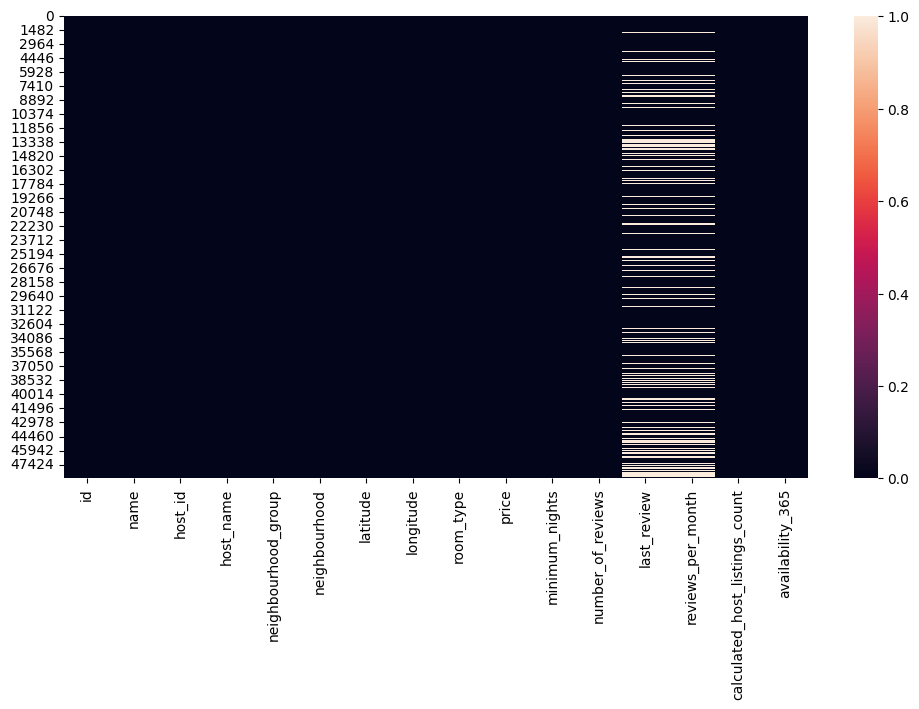

In [27]:
# Visualizing the missing values
plt.figure(figsize = (12,6))
sns.heatmap(airbnb_df.isna())

### What did you know about your dataset?

The following are the initial overview of the dataset:


*   The dataset has 48895 observations (rows) and 16 variables (columns).
*   There are 6 numeric columns and 10 categorical columns.
*   4 columns have null values out of which the 'last_review' and 'reviews_per_month' have 10052 null values. Columns 'host_name' and 'name' have 21 and 16 null values respectively.
*   There are no duplicate observations.






## ***2. Understanding Your Variables***

In [29]:
# Dataset Columns
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [30]:
# Dataset Describe
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Variables Description 

1.	id: unique identification number of the listing
2.	name: title or name of the listing
3.	host_id: unique identification number of the host
4.	host_name: name of the host
5.	neighbourhood_group: borough or area of the listing
6.	neighbourhood: specific neighborhood of the listing
7.	latitude: geographic coordinate of the listing
8.	longitude: geographic coordinate of the listing
9.	room_type: type of room available for booking (Entire home/apt,Private room, Shared room)
10.	price: nightly price for the listing
11.	minimum_nights: minimum number of nights required for a booking
12.	number_of_reviews: total number of reviews the listing has received
13.	last_review: date of the last review for the listing
14.	reviews_per_month: average number of reviews per month for the listing
15.	calculated_host_listings_count: total number of listings the host has
16.	availability_365: number of days the listing is available for booking within the next 365 days.


### Check Unique Values for each variable.

In [44]:
# Check Unique Values for each variable.
for i in airbnb_df.columns:
  print(f"The number of unique values in column '{i}' is {airbnb_df[i].nunique()}")

The number of unique values in column 'id' is 48895
The number of unique values in column 'name' is 47905
The number of unique values in column 'host_id' is 37457
The number of unique values in column 'host_name' is 11452
The number of unique values in column 'neighbourhood_group' is 5
The number of unique values in column 'neighbourhood' is 221
The number of unique values in column 'latitude' is 19048
The number of unique values in column 'longitude' is 14718
The number of unique values in column 'room_type' is 3
The number of unique values in column 'price' is 674
The number of unique values in column 'minimum_nights' is 109
The number of unique values in column 'number_of_reviews' is 394
The number of unique values in column 'last_review' is 1764
The number of unique values in column 'reviews_per_month' is 937
The number of unique values in column 'calculated_host_listings_count' is 47
The number of unique values in column 'availability_365' is 366


In [50]:
#Checking unique values of columns neighbourhood_group and room_type:
print(airbnb_df['neighbourhood_group'].unique())
print(airbnb_df['room_type'].unique())

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
['Private room' 'Entire home/apt' 'Shared room']


## 3. ***Data Wrangling***

### Data Wrangling Code

In [53]:
# Write your code to make your dataset analysis ready.

In [119]:
#Removing columns host_id and last_review as they are not necessary for the analysis and saving it as a new dataframe:
df1 = airbnb_df.drop(['host_id','last_review'],axis=1)
df1.head(3)

,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365


In [60]:
df1.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


<Axes: ylabel='availability_365'>

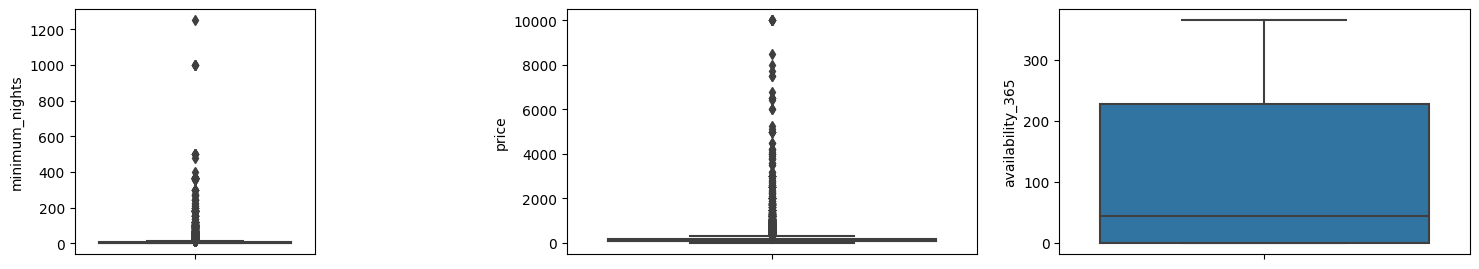

In [99]:
#Checking for outliers:
plt.figure(figsize = (18,7))
plt.subplot(2,5,1)
sns.boxplot(y = df1['minimum_nights'])
plt.subplot(2,3,2)
sns.boxplot(y = df1['price'])
plt.subplot(2,3,3)
sns.boxplot(y = df1['availability_365'])

In [103]:
#Count of listings that have availaibity 0:
print(df1[df1['availability_365']==0]['availability_365'].count())
df1[df1['availability_365']==0]['availability_365']

17533


4        0
6        0
8        0
14       0
20       0
        ..
48550    0
48731    0
48756    0
48760    0
48779    0
Name: availability_365, Length: 17533, dtype: int64

In [ ]:
#Assigning the minimum_nights value to the availability for those listings that have availability 0:
df1.loc[df1['availability_365']==0,'availability_365'] = df1['minimum_nights']

In [106]:
#Count of number of listings that have minimum heights greater than its corresponding availability
print(df1[df1['minimum_nights']>df1['availability_365']]['minimum_nights'].count())
df1.loc[df1['minimum_nights']>df1['availability_365'],['minimum_nights','availability_365']]

18366


,minimum_nights,availability_365
4,10,0
6,45,0
8,2,0
14,90,0
20,3,0
...,...,...
48731,8,0
48753,30,10
48756,2,0
48760,1,0


In [110]:
#Assigning the availabilityminimum_nights value to the minimum_nights for those listings that have minimum_nights greater than its availability:
df1.loc[df1['minimum_nights']>df1['availability_365'],'minimum_nights'] = df1['availability_365']

In [74]:
df1.loc[df1['minimum_nights']>df1['availability_365'],['minimum_nights','availability_365']]

,minimum_nights,availability_365
4,10,0
6,45,0
8,2,0
14,90,0
20,3,0
...,...,...
48731,8,0
48753,30,10
48756,2,0
48760,1,0


In [120]:
#Listings that are priced 0:
df1[df1['price']==0]['price']

23161    0
25433    0
25634    0
25753    0
25778    0
25794    0
25795    0
25796    0
26259    0
26841    0
26866    0
Name: price, dtype: int64

In [121]:
# Removing those listingsd that are priced 0:
df1.drop(df1[df1['price']==0].index, inplace = True)

### What all manipulations have you done and insights you found?

1.  Identified outliers in the price and minimum night variables.
2.  Some of the listings had 0 days as availability while its corresponding minimum night values were more than 0. Replacing such observations of the availability variable with its corresponding minimum night value.
3.  Replaced those observations of the minimum nights variable which were greater than its corresponding availabilty values with the availabilty values
4.  11 listings were priced 0 and hence were removed from the dataset. 


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***